In [26]:
import pandas as pd

In [27]:
da_prices = pd.read_parquet('../data/raw/belgium/day_ahead_prices.parquet')
balancing_prices = pd.read_parquet('../data/raw/belgium/imbalance_prices.parquet')
forecast_energy = pd.read_parquet('../data/raw/belgium/forecasts.parquet')

In [28]:
da_prices

,day_ahead_price_BE
2024-01-01 00:00:00+01:00,0.10
2024-01-01 01:00:00+01:00,0.01
2024-01-01 02:00:00+01:00,0.00
2024-01-01 03:00:00+01:00,-0.01
2024-01-01 04:00:00+01:00,-0.03
...,...
2024-12-31 19:00:00+01:00,81.30
2024-12-31 20:00:00+01:00,45.60
2024-12-31 21:00:00+01:00,17.60
2024-12-31 22:00:00+01:00,4.04


In [29]:
balancing_prices = balancing_prices.resample('h').mean()
balancing_prices

,imbalanceprice
2024-01-01 00:00:00+01:00,207.09500
2024-01-01 01:00:00+01:00,142.48000
2024-01-01 02:00:00+01:00,200.47750
2024-01-01 03:00:00+01:00,181.78750
2024-01-01 04:00:00+01:00,116.31250
...,...
2024-12-31 19:00:00+01:00,-39.70275
2024-12-31 20:00:00+01:00,-50.58075
2024-12-31 21:00:00+01:00,-8.18275
2024-12-31 22:00:00+01:00,74.52875


In [30]:
forecast_energy = forecast_energy[forecast_energy['farm'] == 'Mermaid']
forecast_energy

,farm,q_0.05,q_0.1,q_0.25,q_0.5,q_0.75,q_0.9,q_0.95,E_power,Var_power,observed_power
2024-01-01 00:00:00+01:00,Mermaid,190301.171875,196578.6250,212021.125000,223802.328125,229115.812500,230878.890625,231860.359375,218574.732746,1.940555e+08,213000.0
2024-01-01 01:00:00+01:00,Mermaid,190301.171875,196578.6250,212090.171875,224289.703125,229078.812500,230878.734375,232105.203125,218737.882723,1.958316e+08,211000.0
2024-01-01 02:00:00+01:00,Mermaid,190301.171875,196578.6250,212270.437500,224289.703125,229173.921875,231504.875000,232244.984375,218833.089601,1.966212e+08,219000.0
2024-01-01 03:00:00+01:00,Mermaid,190301.171875,196578.6250,212270.437500,224314.250000,229776.078125,231718.812500,232458.093750,219003.197159,2.003177e+08,214000.0
2024-01-01 04:00:00+01:00,Mermaid,190301.171875,196578.6250,212270.437500,224314.250000,230038.781250,231413.937500,232315.656250,219035.739216,2.009014e+08,216000.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00+01:00,Mermaid,190301.171875,196578.6250,210960.937500,222064.171875,228939.281250,231154.062500,231952.218750,217891.508420,1.927636e+08,201000.0
2024-12-31 20:00:00+01:00,Mermaid,190301.171875,196578.6250,211063.328125,222947.250000,227921.968750,229726.015625,231524.375000,217823.689913,1.876758e+08,191000.0
2024-12-31 21:00:00+01:00,Mermaid,190301.171875,196578.6250,211270.750000,222864.703125,228227.296875,228273.953125,231299.515625,217892.388642,1.888979e+08,211000.0
2024-12-31 22:00:00+01:00,Mermaid,190301.171875,196578.6250,211063.328125,223374.656250,227859.062500,227863.859375,231144.031250,217871.204030,1.885428e+08,211000.0


In [31]:
# merge all files on index
merged = pd.merge(da_prices, balancing_prices, left_index=True, right_index=True, suffixes=('_da', '_balancing'))
merged = pd.merge(merged, forecast_energy, left_index=True, right_index=True, suffixes=('', '_forecast'))
merged

,day_ahead_price_BE,imbalanceprice,farm,q_0.05,q_0.1,q_0.25,q_0.5,q_0.75,q_0.9,q_0.95,E_power,Var_power,observed_power
2024-01-01 00:00:00+01:00,0.10,207.09500,Mermaid,190301.171875,196578.6250,212021.125000,223802.328125,229115.812500,230878.890625,231860.359375,218574.732746,1.940555e+08,213000.0
2024-01-01 01:00:00+01:00,0.01,142.48000,Mermaid,190301.171875,196578.6250,212090.171875,224289.703125,229078.812500,230878.734375,232105.203125,218737.882723,1.958316e+08,211000.0
2024-01-01 02:00:00+01:00,0.00,200.47750,Mermaid,190301.171875,196578.6250,212270.437500,224289.703125,229173.921875,231504.875000,232244.984375,218833.089601,1.966212e+08,219000.0
2024-01-01 03:00:00+01:00,-0.01,181.78750,Mermaid,190301.171875,196578.6250,212270.437500,224314.250000,229776.078125,231718.812500,232458.093750,219003.197159,2.003177e+08,214000.0
2024-01-01 04:00:00+01:00,-0.03,116.31250,Mermaid,190301.171875,196578.6250,212270.437500,224314.250000,230038.781250,231413.937500,232315.656250,219035.739216,2.009014e+08,216000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00+01:00,81.30,-39.70275,Mermaid,190301.171875,196578.6250,210960.937500,222064.171875,228939.281250,231154.062500,231952.218750,217891.508420,1.927636e+08,201000.0
2024-12-31 20:00:00+01:00,45.60,-50.58075,Mermaid,190301.171875,196578.6250,211063.328125,222947.250000,227921.968750,229726.015625,231524.375000,217823.689913,1.876758e+08,191000.0
2024-12-31 21:00:00+01:00,17.60,-8.18275,Mermaid,190301.171875,196578.6250,211270.750000,222864.703125,228227.296875,228273.953125,231299.515625,217892.388642,1.888979e+08,211000.0
2024-12-31 22:00:00+01:00,4.04,74.52875,Mermaid,190301.171875,196578.6250,211063.328125,223374.656250,227859.062500,227863.859375,231144.031250,217871.204030,1.885428e+08,211000.0


In [32]:
merged['best_price'] = merged[['day_ahead_price_BE', 'imbalanceprice']].max(axis=1)

In [33]:
merged

,day_ahead_price_BE,imbalanceprice,farm,q_0.05,q_0.1,q_0.25,q_0.5,q_0.75,q_0.9,q_0.95,E_power,Var_power,observed_power,best_price
2024-01-01 00:00:00+01:00,0.10,207.09500,Mermaid,190301.171875,196578.6250,212021.125000,223802.328125,229115.812500,230878.890625,231860.359375,218574.732746,1.940555e+08,213000.0,207.09500
2024-01-01 01:00:00+01:00,0.01,142.48000,Mermaid,190301.171875,196578.6250,212090.171875,224289.703125,229078.812500,230878.734375,232105.203125,218737.882723,1.958316e+08,211000.0,142.48000
2024-01-01 02:00:00+01:00,0.00,200.47750,Mermaid,190301.171875,196578.6250,212270.437500,224289.703125,229173.921875,231504.875000,232244.984375,218833.089601,1.966212e+08,219000.0,200.47750
2024-01-01 03:00:00+01:00,-0.01,181.78750,Mermaid,190301.171875,196578.6250,212270.437500,224314.250000,229776.078125,231718.812500,232458.093750,219003.197159,2.003177e+08,214000.0,181.78750
2024-01-01 04:00:00+01:00,-0.03,116.31250,Mermaid,190301.171875,196578.6250,212270.437500,224314.250000,230038.781250,231413.937500,232315.656250,219035.739216,2.009014e+08,216000.0,116.31250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00+01:00,81.30,-39.70275,Mermaid,190301.171875,196578.6250,210960.937500,222064.171875,228939.281250,231154.062500,231952.218750,217891.508420,1.927636e+08,201000.0,81.30000
2024-12-31 20:00:00+01:00,45.60,-50.58075,Mermaid,190301.171875,196578.6250,211063.328125,222947.250000,227921.968750,229726.015625,231524.375000,217823.689913,1.876758e+08,191000.0,45.60000
2024-12-31 21:00:00+01:00,17.60,-8.18275,Mermaid,190301.171875,196578.6250,211270.750000,222864.703125,228227.296875,228273.953125,231299.515625,217892.388642,1.888979e+08,211000.0,17.60000
2024-12-31 22:00:00+01:00,4.04,74.52875,Mermaid,190301.171875,196578.6250,211063.328125,223374.656250,227859.062500,227863.859375,231144.031250,217871.204030,1.885428e+08,211000.0,74.52875


In [34]:
merged['da_revenue'] = merged['day_ahead_price_BE'] * merged['E_power']/1000
merged['balancing_revenue'] = merged['imbalanceprice'] * merged['E_power']/1000
merged['hindsight_revenue'] = merged['best_price'] * merged['E_power']/1000

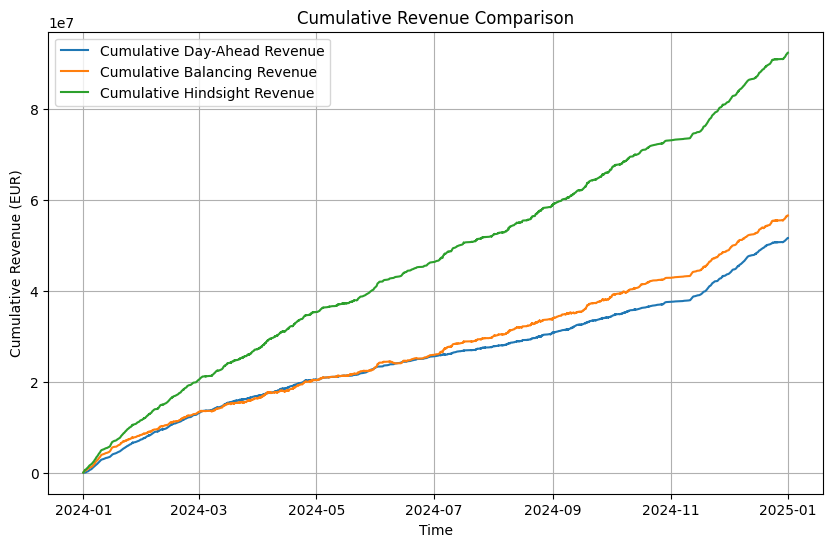

In [35]:
#make cumulative plot of the revenues
merged['cumulative_da_revenue'] = merged['da_revenue'].cumsum()
merged['cumulative_balancing_revenue'] = merged['balancing_revenue'].cumsum()
merged['cumulative_hindsight_revenue'] = merged['hindsight_revenue'].cumsum()
# plot the cumulative revenues
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(merged.index, merged['cumulative_da_revenue'], label='Cumulative Day-Ahead Revenue')
plt.plot(merged.index, merged['cumulative_balancing_revenue'], label='Cumulative Balancing Revenue')
plt.plot(merged.index, merged['cumulative_hindsight_revenue'], label='Cumulative Hindsight Revenue')
plt.xlabel('Time')
plt.ylabel('Cumulative Revenue (EUR)')
plt.title('Cumulative Revenue Comparison')
plt.legend()
plt.grid()
plt.show()